## Previsão de Popularidade da Marca ##

## Brand Popularity Prediction ##

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('smartphones.csv')
df.head(n=1)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828


In [3]:
# Agregue os dados para contar a quantidade de modelos por marca
brand_popularity = df['brand_name'].value_counts().reset_index()
brand_popularity.columns = ['Brand', 'Count']

In [4]:
# Renomeie as colunas para facilitar a interpretação
brand_popularity.rename(columns={'Brand': 'Marca', 'Count': 'Popularidade'}, inplace=True)


In [5]:
# Vamos considerar o ano como variável independente
# Você pode usar a data de lançamento do modelo para extrair o ano
# Por exemplo, df['year'] = pd.to_datetime(df['data_de_lancamento']).dt.year

# Divida os dados em conjunto de treinamento e teste
X = np.array(brand_popularity.index).reshape(-1, 1)
y = brand_popularity['Popularidade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Crie um modelo de regressão linear
model = LinearRegression()

In [7]:
# Treine o modelo
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Faça previsões
y_pred = model.predict(X_test)

In [9]:
# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R^2): {r2}")

Erro Quadrático Médio (MSE): 454.0929177054369
Coeficiente de Determinação (R^2): 0.6441724253185832


**Erro Quadrático Médio (MSE): 454.09**

O MSE mede a média dos quadrados dos erros entre as previsões e os valores reais. Quanto menor o MSE, melhor. **Neste caso, um MSE de 454.09 sugere que o modelo não se ajusta perfeitamente aos dados**, mas ainda assim fornece uma previsão razoável.

**Coeficiente de Determinação (R^2): 0.644**

O coeficiente de determinação, também conhecido como R-quadrado, varia de 0 a 1 e mede a proporção da variância na variável dependente que é explicada pelo modelo. Neste caso, um **R^2 de 0.644** significa que **o modelo explica aproximadamente 64.4% da variabilidade** na popularidade da marca. 

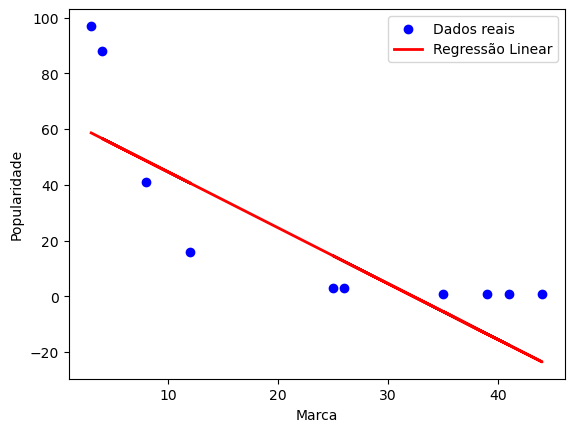

In [10]:
# Plote a linha de regressão
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Marca')
plt.ylabel('Popularidade')
plt.legend()
plt.show()